In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sn

In [3]:
import pandas as pd

df = pd.read_stata("/content/binary.dta")
df.to_csv("output.csv",index=False)

In [4]:
df = pd.read_csv('output.csv')
col_names = df.columns.tolist()
col_names

['admit', 'gre', 'gpa', 'rank']

In [5]:
df.head()

,admit,gre,gpa,rank
0,0.0,380.0,3.61,3.0
1,1.0,660.0,3.67,3.0
2,1.0,800.0,4.00,1.0
3,1.0,640.0,3.19,4.0
4,0.0,520.0,2.93,4.0


In [6]:
df.tail()

,admit,gre,gpa,rank
395,0.0,620.0,4.00,2.0
396,0.0,560.0,3.04,3.0
397,0.0,460.0,2.63,2.0
398,0.0,700.0,3.65,2.0
399,0.0,600.0,3.89,3.0


In [7]:
df.isnull().sum()

,0
admit,0
gre,0
gpa,0
rank,0


In [11]:
x = df[['gre', 'gpa', 'rank']]
y = df['admit']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=42)
display(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(280, 3)

(280,)

(120, 3)

(120,)

In [12]:
model = LogisticRegression(solver='lbfgs', max_iter=1000)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

In [13]:
conf_mat = metrics.confusion_matrix(y_test,y_pred)
print('Confusion Matrix : \n', conf_mat)
acc_score = metrics.accuracy_score(y_test,y_pred)
print('Accuracy : ', acc_score)
print('Acc in % : ', int(acc_score*100),'%')

Confusion Matrix : 
 [[79  2]
 [31  8]]
Accuracy :  0.725
Acc in % :  72 %


<Axes: xlabel='Predicted', ylabel='Actual'>

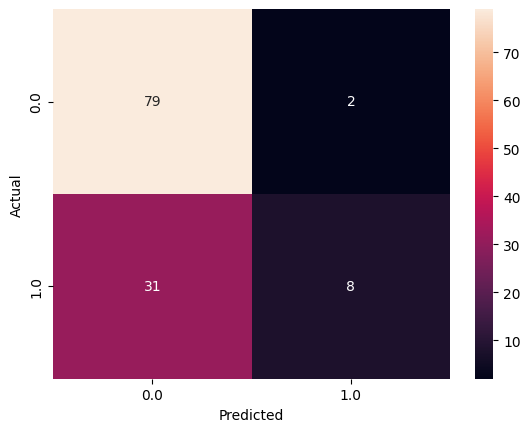

In [14]:
conf_mat = pd.crosstab(y_test,y_pred,rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(conf_mat, annot=True)